In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from criticalZoom import critical_zoom
from timebudget import timebudget
timebudget.set_quiet(False)  # don't show measurements as they happen
timebudget.report_at_exit(True)  # Generate report when the program exits


In [129]:
tmin=60
tmax=240
numtemp=25



#light quark mass
ml=40

#chemical potential
mu=0

lambda1= .1 #parameter for mixing between dilaton and chiral field

minsigma=0
maxsigma=500

mu0=430
mu1=830
mu2=176

order, iterationNumber, sigma_list,temps_list,Tc=critical_zoom(tmin,tmax,numtemp,minsigma,maxsigma,ml,mu,lambda1,mu0,mu1,mu2)




/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/Dropbox/ISU/Research/QGP/DilatonMixing/Exponential_dilaton/criticalZoom.py:165: RuntimeWarning: overflow encountered in square
  test = ((-u**2*fp)/f)*chiFields[:,1]-1/f*(3*chi

get_all_sigmas_parallel took 6.004sec
Crossover or 2nd order
Pseudo-Critical temperature is between 165.0 195.0
Iteration number  1
get_all_sigmas_parallel took 5.539sec
Crossover or 2nd order
Pseudo-Critical temperature is between 182.5 187.5
Iteration number  2
get_all_sigmas_parallel took 4.747sec
Crossover or 2nd order
Pseudo-Critical temperature is between 184.375 185.20833333333334
Iteration number  3
get_all_sigmas_parallel took 3.906sec
Crossover or 2nd order
Pseudo-Critical temperature is between 184.79166666666669 184.93055555555557
Iteration number  4
get_all_sigmas_parallel took 2.086sec
Crossover or 2nd order
Pseudo-Critical temperature is between 184.86689814814815 184.8900462962963
Iteration number  5
get_all_sigmas_parallel took 1.611sec
Crossover or 2nd order
Pseudo-Critical temperature is between 184.88811728395063 184.8900462962963
Iteration number  6
get_all_sigmas_parallel took 18.469sec
Crossover or 2nd order
Pseudo-Critical temperature is between 184.888921039094

In [130]:
max(sigma_list[0][:,0])

439.0

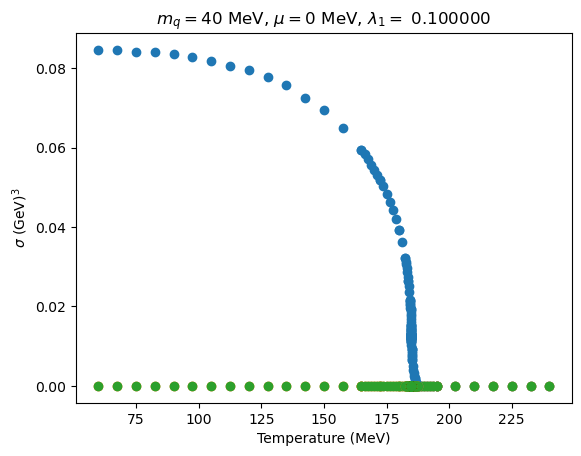

In [131]:
#plot all the sigma values for each iteration
#get the standard colors for matplotlib
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

#find the index of when sigma_list[0][:,0] has its first zero value
#this is the index of the first temperature where the sigma value is zero

max_index=np.argmax(sigma_list[0][:,0]==0)
#find the value of the temperature at this index
max_temp=temps_list[0][max_index]



for i in range(len(sigma_list)):
    plt.scatter(temps_list[i],(sigma_list[i][:,0]/1000)**3,color=colors[0])
    plt.scatter(temps_list[i],(sigma_list[i][:,1]/1000)**3,color=colors[1])
    plt.scatter(temps_list[i],(sigma_list[i][:,2]/1000)**3,color=colors[2])
plt.xlabel("Temperature (MeV)")
plt.ylabel("$\sigma$ (GeV)$^3$")
#set the x range
#plt.xlim(temps_list[0][0],max_temp)
plt.title(r'$m_q=%i$ MeV, $\mu=%i$ MeV, $\lambda_1=$ %f' %(ml,mu,lambda1))
plt.show()
    

In [ ]:
#load the data frame from the pickle file
df2=pd.read_pickle('chiral_transition_mq%i_mu%i_lambda1%f_order%i.pkl' %(ml,mu,lambda1,order))

#plot the data frame
df2.plot.scatter(x='temps',y=['sigma1'])
plt.xlabel("Temperature (MeV)")
plt.ylabel("$\sigma$ (GeV$^3$)")
plt.title(r'$m_q=%i$ MeV, $\mu=%i$ MeV, $\lambda_1=$ %f' %(ml,mu,lambda1))
plt.show()

In [ ]:
# Save the data as a pandas dataframe
df_all_list = []
for i in range(len(sigma_list)):
    df=pd.DataFrame()
    df['temps']=temps_list[i]
    df['sigma1']=(sigma_list[i][:,0]/1000)**3   
    df['sigma2']=(sigma_list[i][:,1]/1000)**3
    df['sigma3']=(sigma_list[i][:,2]/1000)**3
    df['order']=order
    df['ml']=ml
    df['mu']=mu
    df['lambda1']=lambda1
    df['Tc']=Tc
    df_all_list.append(df)

# Use pandas concat here
df_all = pd.concat(df_all_list)

#pickle the data frame
df_all.to_pickle('data/chiral_transition_mq%i_mu%i_lambda1%f_order%i.pkl' %(ml,mu,lambda1,order))
